## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [5]:
from google.colab import files
uploaded = files.upload()

Saving covtype.csv to covtype (1).csv


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os

#### 1. Abra a base de dados em questão

In [7]:
data = pd.read_csv('covtype.csv')
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


#### 2. Elimine todas as colunas relativas aos atributos categóricos

In [ ]:
#Armazenando nome de colunas a serem eliminadas em uma lista
columns_out = []

#Atributo área selvagem
for i in range(1, 5):
    columns_out.append('Wilderness_Area' + str(i))
    
#Atributo tipo de solo
for i in range(1, 41):
    columns_out.append('Soil_Type' + str(i))
    
data = data.drop(columns=columns_out)
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3
581008,2391,152,19,67,12,95,240,237,119,845,3
581009,2386,159,17,60,7,90,236,241,130,854,3
581010,2384,170,15,60,5,90,230,245,143,864,3


#### 3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X

In [ ]:
#Dataframe apenas com os atributos preditores
data_atr = data.drop(columns=['Cover_Type'])

In [ ]:
X = np.array(data_atr[0:])

y = data['Cover_Type'].to_numpy()

#### 4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 5. Efetue o escalonamento dos atributos

In [ ]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

#### 6. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    6.1 Utilize a função de ativação ReLU  
    6.2 Utilize o solver Adam    
    6.3 Imprima o passo a passo do treinamento    
    6.4 Utilize o número máximo de épocas igual a 300

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, verbose=True).fit(X_train_std, y_train)

Iteration 1, loss = 1.15855536
Iteration 2, loss = 0.93633758
Iteration 3, loss = 0.81378047
Iteration 4, loss = 0.76297898
Iteration 5, loss = 0.74188448
Iteration 6, loss = 0.73104022
Iteration 7, loss = 0.72266263
Iteration 8, loss = 0.71741397
Iteration 9, loss = 0.71387191
Iteration 10, loss = 0.71103413
Iteration 11, loss = 0.70855941
Iteration 12, loss = 0.70654591
Iteration 13, loss = 0.70453859
Iteration 14, loss = 0.70268788
Iteration 15, loss = 0.70103590
Iteration 16, loss = 0.69953178
Iteration 17, loss = 0.69798406
Iteration 18, loss = 0.69666615
Iteration 19, loss = 0.69521450
Iteration 20, loss = 0.69399674
Iteration 21, loss = 0.69301898
Iteration 22, loss = 0.69188746
Iteration 23, loss = 0.69074159
Iteration 24, loss = 0.68982278
Iteration 25, loss = 0.68885431
Iteration 26, loss = 0.68804036
Iteration 27, loss = 0.68723322
Iteration 28, loss = 0.68650841
Iteration 29, loss = 0.68576808
Iteration 30, loss = 0.68519904
Iteration 31, loss = 0.68425501
Iteration 32, los

#### 7. Com o modelo em questão, após o treinamento, apresente:  
    7.1 Matriz de confusão para o conjunto de teste  
    7.2 Acurácia  
    7.3 F-Score  
    7.4 Precisão  
    7.5 Revocação  

In [ ]:
y_pred = clf.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))

print("")
print("Acurácia: " + str(np.round(clf.score(X_test_std, y_test)*100, 4)) + "%")

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precisão:",np.round(precision, 4))

recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print("Revocação:",np.round(recall, 4))

fscore = 2 * (precision * recall) / (precision + recall)
print("F-Score:",np.round(fscore, 4))

[[45566 16471     3     0     0    17  1585]
 [16349 67345  1044     0    12   232   134]
 [    0  2198  7536    97     0   795     0]
 [    0    13   430   371     0    27     0]
 [    1  2745    38     0    12     1     0]
 [    0  1628  3002    21     0   546     0]
 [ 2661    19     0     0     0     0  3405]]

Acurácia: 71.5881%
Precisão: 0.7044
Revocação: 0.7159
F-Score: 0.7101


#### 8. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    8.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    8.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino 

In [18]:
@ignore_warnings(category=ConvergenceWarning)
def training(iterations, architecture, function, solver, max_epochs ,presentation):
  #numpy array para armzanear as acurácias
  acurr_arr = np.array([])

  #numpy array para armzanear os F-scores
  fscore_arr = np.array([])

  for i in range(10):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

      #Escalonamento
      X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
      X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
      
      clf = MLPClassifier(hidden_layer_sizes=architecture, activation=function, solver=solver, max_iter=max_epochs, verbose=False).fit(X_train_std, y_train)
      y_pred = clf.predict(X_test_std)
      
      acurr_arr = np.append(acurr_arr, clf.score(X_test_std, y_test))
      fscore_arr = np.append(fscore_arr, f1_score(y_test, y_pred, average='weighted'))

  if (presentation == 1):
    print("")   
    print("Resultados")
    print("")
    print("Acurácia")
    print("Média:" + str(np.round(np.mean(acurr_arr), 4)))
    print("Desvio padrão:" + str(np.round(np.std(acurr_arr), 4)))
    print("")
    print("F-Score")
    print("Média:" + str(np.round(np.mean(fscore_arr), 4)))
    print("Desvio padrão:" + str(np.round(np.std(fscore_arr), 4)))
    return np.mean(acurr_arr), np.mean(fscore_arr)

  elif (presentation == 2):
    print("")   
    print("Resultados")
    print("")
    print("Acurácia")
    print("Média:" + str(np.round(np.mean(acurr_arr), 4)) + " +-" + str(np.round(np.std(acurr_arr), 4)))
    print("")
    print("F-Score")
    print("Média:" + str(np.round(np.mean(fscore_arr), 4)) + " +-" + str(np.round(np.std(fscore_arr), 4)))
    return acurr_arr, fscore_arr
  

In [ ]:
training(10, (10,), 'relu', 'adam', 300, 1)

Acurácia
Média:0.7123
Desvio padrão:0.0047

F-Score
Média:0.6991
Desvio padrão:0.0053


#### 9. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  

In [ ]:
training(10, (10,), 'relu', 'sgd', 300, 1)

Resultados

Acurácia
Média:0.7038
Desvio padrão:0.0054

F-Score
Média:0.6876
Desvio padrão:0.0058


(0.7038369744813658, 0.6875760787618226)

#### 10. Houve influência da escolha do otimizador no desempenho da rede?

O solver adam parece ter uma ligeira vantagem.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

#### 1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha.

*   Arquitetura 1 - 1 camada oculta, 1 neurônio, função ReLU
*   Arquitetura 2 - 1 camada oculta, 5 neurônios, função ReLU
*   Arquitetura 3 - 2 camada oculta, 10 neurônios, 9 neurônios, função ReLU
*   Arquitetura 4 - 2 camada oculta, 10 neurônios, 1 neurônio, função ReLU
*   Arquitetura 5 - 2 camada oculta, 10 neurônios, 5 neurônios, função ReLU
*   Arquitetura 6 - 2 camada oculta, 1 neurônio, 10 neurônios, função ReLU
*   Arquitetura 7 - 2 camada oculta, 5 neurônios, 10 neurônios, função ReLU
*   Arquitetura 8 - 1 camada oculta, 10 neurônios, função tangenta hiperbólica
*   Arquitetura 9 - 1 camada oculta, 10 neurônios, função logistica
*   Arquitetura 10 - 1 camada oculta, 10 neurônios, função identidade


In [ ]:
architectures = [[(1,), 'relu'], [(5,), 'relu'], [(10, 9), 'relu'], [(10, 1), 'relu'], [(10, 5), 'relu'],
                [(1, 10), 'relu'], [(5, 10), 'relu'], [(10,), 'tanh'], [(10,), 'logistic'], [(10,), 'identity']]

In [ ]:
acurr_arr = np.array([])
fscore_arr = np.array([])

for i in range(10):
  print("Arquitetura " + str(i + 1) + " treinando")
  ac, fs = training(10, architectures[i][0], architectures[i][1], 'adam', 100, 1)
  acurr_arr = np.append(acurr_arr, ac)
  fscore_arr = np.append(fscore_arr, fs)

Arquitetura 1 treinando
Resultados

Acurácia
Média:0.6281
Desvio padrão:0.0916

F-Score
Média:0.5616
Desvio padrão:0.158
Arquitetura 2 treinando
Resultados

Acurácia
Média:0.6967
Desvio padrão:0.0048

F-Score
Média:0.68
Desvio padrão:0.0069
Arquitetura 3 treinando
Resultados

Acurácia
Média:0.7187
Desvio padrão:0.005

F-Score
Média:0.7075
Desvio padrão:0.0058
Arquitetura 4 treinando
Resultados

Acurácia
Média:0.5966
Desvio padrão:0.1087

F-Score
Média:0.5016
Desvio padrão:0.1815
Arquitetura 5 treinando
Resultados

Acurácia
Média:0.7124
Desvio padrão:0.0047

F-Score
Média:0.6978
Desvio padrão:0.0072
Arquitetura 6 treinando
Resultados

Acurácia
Média:0.6892
Desvio padrão:0.0024

F-Score
Média:0.6672
Desvio padrão:0.004
Arquitetura 7 treinando
Resultados

Acurácia
Média:0.7079
Desvio padrão:0.0047

F-Score
Média:0.693
Desvio padrão:0.0048
Arquitetura 8 treinando
Resultados

Acurácia
Média:0.7106
Desvio padrão:0.0025

F-Score
Média:0.6971
Desvio padrão:0.0021
Arquitetura 9 treinando
Result

In [ ]:
# Salvando os resultados:
acurr_results = [0.6281, 0.6967, 0.7187, 0.5966, 0.7124, 0,6892, 0.7079, 0.7106, 0.7107, 0.6905]
fscore_results = [0.5616, 0.68, 0.7075, 0.5016, 0.6978, 0.6672, 0.693, 0.6971, 0.6953, 0.6731] 

#### 2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
#### 3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn

No tocante à acurácia, as três melhores redes foram:
1.  Arquitetura 3: Acurácia=0.7187
2.  Arquitetura 5: Acurácia=0.7124
3.  Arquitetura 9: Acurácia=0.7109
 
No tocante à F-Score, as três melhores redes foram:
1.  Arquitetura 3: F-Score=0.7075
2.  Arquitetura 5: F-Score=0.6978
3.  Arquitetura 8: F-Score=0.6971



## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

#### 1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.

<div align="justify"> 
  De acordo com a documentação, o modelo de rede neural do MLPClassifier possui uma camada de entrada com uma quantidade de neurônios igual ao número de atributos e um único neurônio na camada de saída.
</div>

#### 2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.

In [ ]:
def calc_nh(alpha, ni):
  return alpha*(math.sqrt(ni))

# α = 0.5
print("Para α=0.5, Nh=" + str(np.round(calc_nh(0.5, 10), 4)))

# α = 2
print("Para α=2, Nh=" + str(np.round(calc_nh(2, 10), 4)))

# α = 3
print("Para α=3, Nh=" + str(np.round(calc_nh(3, 10), 4)))

Para α=0.5, Nh=1.5811
Para α=2, Nh=6.3246
Para α=3, Nh=9.4868


#### 3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [ ]:
#Redes para α=3:
a3_networks = [[(9,), 'relu'], [(8,1), 'relu'], [(7,2), 'relu'], [(6,3), 'relu'], [(5, 4), 'relu'],
               [(9,), 'logistic'], [(8,1), 'logistic'], [(7,2), 'logistic'], [(6,3), 'logistic'], [(5,4), 'logistic']]

#Redes para α=2:
a2_networks = [[(6,), 'relu'], [(5,1), 'relu'], [(4,2), 'relu'], [(3,3), 'relu'], 
               [(6,), 'logistic'], [(5,1), 'logistic'], [(4,2), 'logistic'], [(3,3), 'logistic'],
               [(6,), 'tanh'], [(5,1), 'tanh'], [(4,2), 'tanh'], [(3,3), 'tanh']]

#Redes para α=0.5:
a0_5_networks = [[(2,), 'relu'], [(1,1), 'relu'], 
               [(2,), 'logistic'], [(1,1), 'logistic'],
               [(2,), 'tanh'], [(1,1), 'tanh'],
               [(2,), 'identity'], [(1,1), 'identity']]

networks = [a0_5_networks, a2_networks, a3_networks]


In [ ]:
acurr_a0_5_arr = np.array([])
acurr_a2_arr = np.array([])
acurr_a3_arr = np.array([])

fscore_a0_5_arr = np.array([])
fscore_a2_arr = np.array([])
fscore_a3_arr = np.array([])

for i in range(3):

  if i == 0:
    print("----------------------------------------------------")
    print("Arquiteturas para α=0.5")
    print("----------------------------------------------------")

  if i == 1:
    print("----------------------------------------------------")
    print("Arquiteturas para α=2")
    print("----------------------------------------------------")

  if i == 2:
    print("----------------------------------------------------")
    print("Arquiteturas para α=3")
    print("----------------------------------------------------")

  for j in range(len(networks[i])):
    print("----------------------------------------------------")
    print("Arquitetura " + str(j + 1) + " treinando")
    ac, fs = training(10, networks[i][j][0], networks[i][j][1], 'adam', 100, 1)
  
    if i == 0:
      acurr_a0_5_arr = np.append(acurr_a0_5_arr, ac)
      fscore_a0_5_arr = np.append(fscore_a0_5_arr, fs)
    
    if i == 1:
      acurr_a2_arr = np.append(acurr_a2_arr, ac)
      fscore_a2_arr = np.append(fscore_a2_arr, fs)

    if i == 2:
      acurr_a3_arr = np.append(acurr_a3_arr, ac)
      fscore_a3_arr = np.append(fscore_a3_arr, fs)
    

----------------------------------------------------
Arquiteturas para α=0.5
----------------------------------------------------
----------------------------------------------------
Arquitetura 1 treinando

Resultados

Acurácia
Média:0.6881
Desvio padrão:0.0012

F-Score
Média:0.6659
Desvio padrão:0.0016
----------------------------------------------------
Arquitetura 2 treinando

Resultados

Acurácia
Média:0.6091
Desvio padrão:0.0993

F-Score
Média:0.5286
Desvio padrão:0.1706
----------------------------------------------------
Arquitetura 3 treinando

Resultados

Acurácia
Média:0.6866
Desvio padrão:0.0011

F-Score
Média:0.6641
Desvio padrão:0.0017
----------------------------------------------------
Arquitetura 4 treinando

Resultados

Acurácia
Média:0.6884
Desvio padrão:0.001

F-Score
Média:0.6643
Desvio padrão:0.0013
----------------------------------------------------
Arquitetura 5 treinando

Resultados

Acurácia
Média:0.6898
Desvio padrão:0.0014

F-Score
Média:0.6677
Desvio padrã

No tocante à acurácia, as três melhores redes foram:
 
1. Arquitetura 7 de α=3 com uma acurácia de 0.7069, a qual consistia de duas camadas ocultas, a primeira com 8 neurônios e a segunda com 1 neurônio e utilizando a função de ativação logística.
 
2. Arquitetura 1 de α=3 com uma acurácia de 0.7068, a qual consistia de uma camada oculta com 9 neurônios e utilizando a função de ativação ReLU.
 
3. Arquitetura 6 de α=3 com uma acurácia de 0.7063, a qual consistia de uma camada oculta de 9 neurônios e utilizando a função de ativação logística.

No tocante à F-Score, as três melhores redes foram:
 
1. Arquitetura 1 de α=3 com um F-Score de 0.6926, a qual consistia de uma camada oculta com 9 neurônios e utilizando a função de ativação ReLU.
 
2. Arquitetura 6 de α=3 com um F-Score de 0.691, a qual consistia de uma camada oculta de 9 neurônios e utilizando a função de ativação logística.
 
3. Arquitetura 9 de α=2 com um F-Score de 0.6893, a qual consistia de de uma camada oculta de 6 neurônios e utilizando a função de ativação tangente hiperbólica.



<div align="justify"> 
  
</div>

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [8]:
#Dataframe apenas com os atributos preditores
data_atr = data.drop(columns=['Cover_Type'])

In [10]:
#Separando atributo alvos de atributos preditores
X = np.array(data_atr[0:])
y = data['Cover_Type'].to_numpy()

In [14]:
#Melhores arquiteturas
architectures = [[(10, 9), 'relu'], [(10, 5), 'relu'], [(10,), 'tanh'],
                 [(9,), 'relu'], [(9,), 'logistic'], [(6,), 'tanh']]

In [19]:
#Treinamento
acu = np.array([])
fsc = np.array([])
for i in range(len(architectures)):
  print("----------------------------------------------------")
  print("Arquitetura " + str(i + 1) + " treinando")
  ac, fs = training(10, architectures[i][0], architectures[i][1], 'adam', 200, 2)
  acu = np.append(acu, ac)
  fsc = np.append(fsc, fs)

----------------------------------------------------
Arquitetura 1 treinando

Resultados

Acurácia
Média:0.719 +-0.0042

F-Score
Média:0.7084 +-0.0062
----------------------------------------------------
Arquitetura 2 treinando

Resultados

Acurácia
Média:0.7158 +-0.0047

F-Score
Média:0.703 +-0.0045
----------------------------------------------------
Arquitetura 3 treinando

Resultados

Acurácia
Média:0.7207 +-0.0018

F-Score
Média:0.7103 +-0.0026
----------------------------------------------------
Arquitetura 4 treinando

Resultados

Acurácia
Média:0.71 +-0.004

F-Score
Média:0.6981 +-0.0046
----------------------------------------------------
Arquitetura 5 treinando

Resultados

Acurácia
Média:0.7192 +-0.0037

F-Score
Média:0.708 +-0.004
----------------------------------------------------
Arquitetura 6 treinando

Resultados

Acurácia
Média:0.7107 +-0.0024

F-Score
Média:0.6982 +-0.003


In [31]:
#Armazenando os F-Score num numpy array de duas dimensões
fsc = np.reshape(fsc, (6, 10))

In [41]:
#Função para fazer boxplot
def boxplt(nparr, box_title, box_xlabel):
    
    fig, axs = plt.subplots()
    fig.set_size_inches(6, 5)

    flierprops = dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none', markeredgecolor='g')
    axs.boxplot([nparr],vert=False, labels=[''], flierprops=flierprops)
    axs.set_title(box_title)
    axs.set_xlabel(box_xlabel, fontsize=14)

    fig.tight_layout(pad=3.0)

    plt.show()

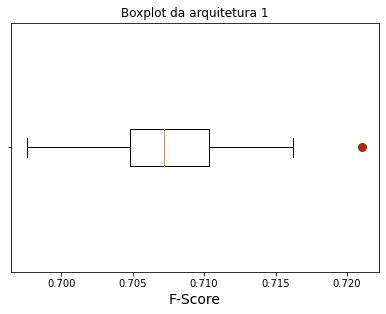

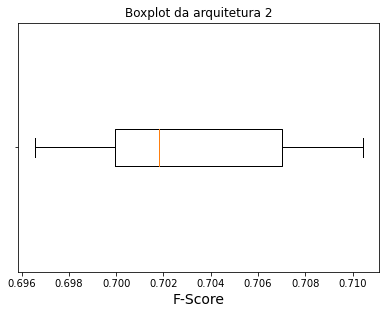

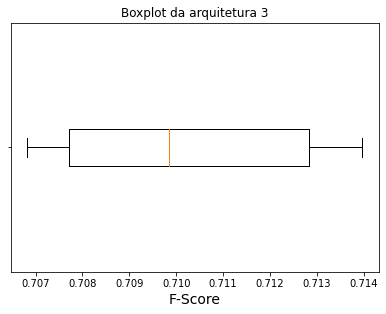

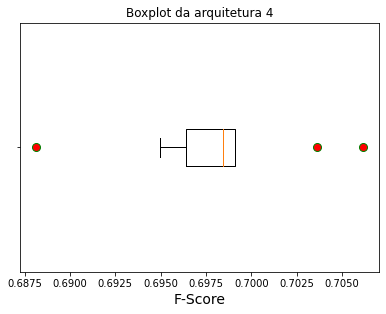

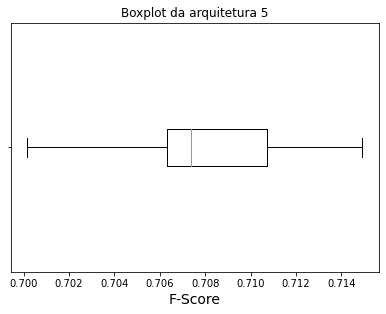

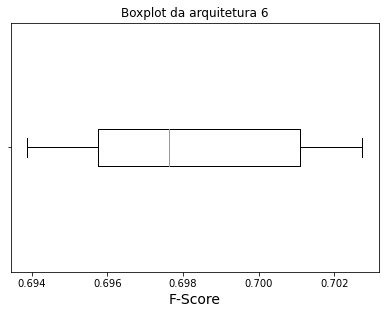

In [42]:
for i in range(6):
  boxplt(fsc[i], 'Boxplot da arquitetura ' + str(i + 1), 'F-Score')

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

#### 1. É possível identificar uma rede com desempenho superior às demais?

<div style="text-align: justify">
        Não foi possível identificar uma única rede com desempenho superior às outras, o que foi possível identificar, foi um conjunto de redes que obteve melhor desempenho em relação às demais, mas esse desempenho melhorado não chega a ser nitidamente superior.
</div>

#### 2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?

<div style="text-align: justify">
        A estratégia própria pareceu ligeiramente superior, mas isso se deve ao fato de que nessa estratégia havia redes com mais neurônios do que as arquiteturas advindas da estratégia da pirâmide geométrica.
</div>

#### 3. Considerar os atributos categóricos trouxe melhorias? Justifique.

<div style="text-align: justify">
  Não, não houve melhorias significativas quanto ao uso dos atributos categóricos, a ligeira melhora se deveu mais ao maior uso de épocas.
</div>

#### 4. Um número maior de épocas trouxe melhorias?

<div style="text-align: justify">
       Sim, os melhores resultados de acurácia e F-Score foram alcançados utilizando mais épocas.
</div>

#### 5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

<div style="text-align: justify">
       Com certeza a demora no tempo de execução foi a  maior dificuldade, visto que não foi possivel fazer as 100 execuções solicitadas nas várias partes do projeto utilizando meios próprios.
</div>